<ipython-input-15-475180bf236c>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[array([0.58614572, 0.66785068, 0.67140308, 0.70337483, 0.76021301,
       0.72291266, 0.68916524, 0.58081695, 0.60745993, 0.71758442,
       0.80817055, 0.80639435, 0.82770856, 0.87744212, 0.95026626,
       0.93783287, 0.97513286, 0.95204246, 1.        , 0.97158082,
       0.9289517 , 0.92362328, 0.9289517 , 0.93428047, 0.90053252,
       0.92717586, 0.82770856, 0.81705136, 0.78507979, 0.76554143,
       0.7708702 , 0.63055069, 0.70337483, 0.65008869, 0.62344572,
       0.61811694, 0.58969776, 0.58969776, 0.62699811, 0.70159845,
       0.78330359, 0.69982226, 0.63055069, 0.51154538, 0.42273545,
       0.46003544, 0.43339246, 0.40319709, 0.36944931, 0.31261096,
       0.33925394, 0.36944931, 0.3623447 , 0.35879212, 0.40497329,
       0.36412089, 0.45470667, 0.48490205, 0.50444041, 0.44582585])]
[0.4866782439292643]

Epoch 1/3
141/141 [==============================] - 6s 22ms/step - loss: 0.0332
Epoch 2/3
141/141 [==============================] - 3s 18ms/step - loss: 0.0133
Epoch 3/3

<ipython-input-15-475180bf236c>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


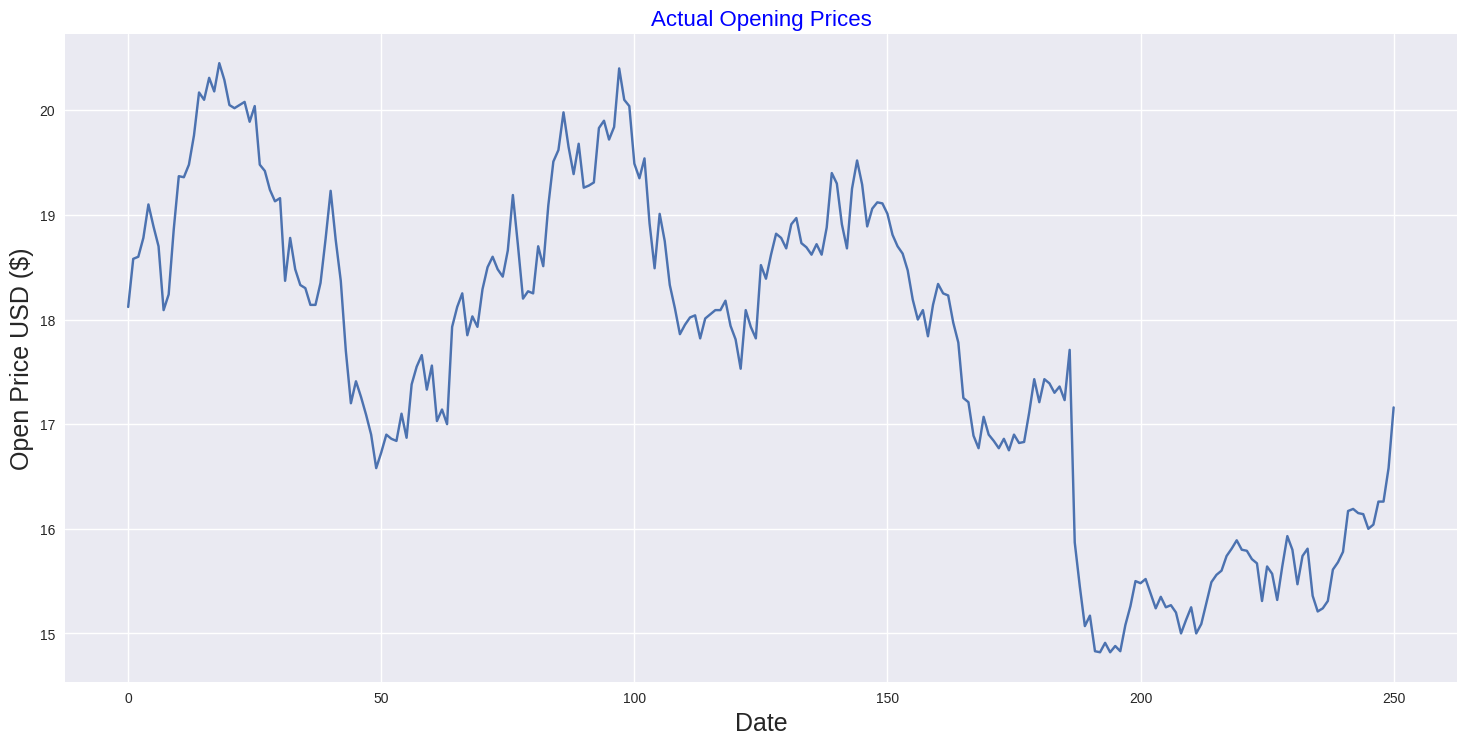

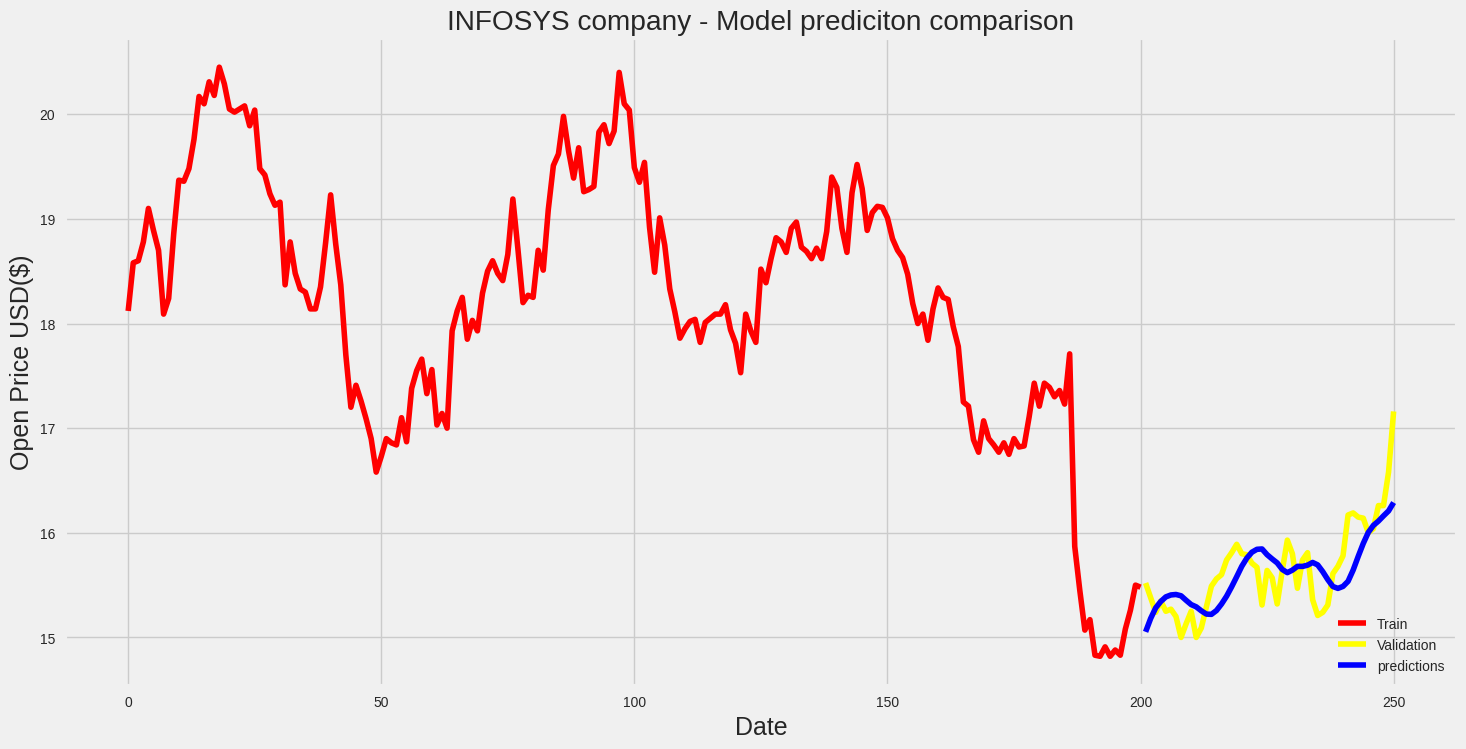

1/1 [==============================] - 0s 22ms/step
Opening Price of /content/INFY.csv tomorrow:[[16.451752]]


In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
ticker = '/content/INFY.csv'
df=pd.read_csv(ticker)#, data_source='yahoo', start='2015-01-01', end='2020-05-20')
df.shape
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
plt.title('Actual Opening Prices',color='blue',fontsize=16)
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
#plt.show()
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
#Convert the data to a numpy array

x_test=np.array(x_test)
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
# mean absolute percentage error (MAPE)
y_test = dataset[training_data_len:, :]

accuracy = np.mean(np.abs((y_test - predictions) / y_test))
print("Prediction Error Accuracy:", accuracy)


#choose plotting style

plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('INFOSYS company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='blue')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()
valid.tail(15)
#Get the quote
stock_quote = pd.read_csv(ticker)#, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')